## **Distribución Binomial Bivariada**

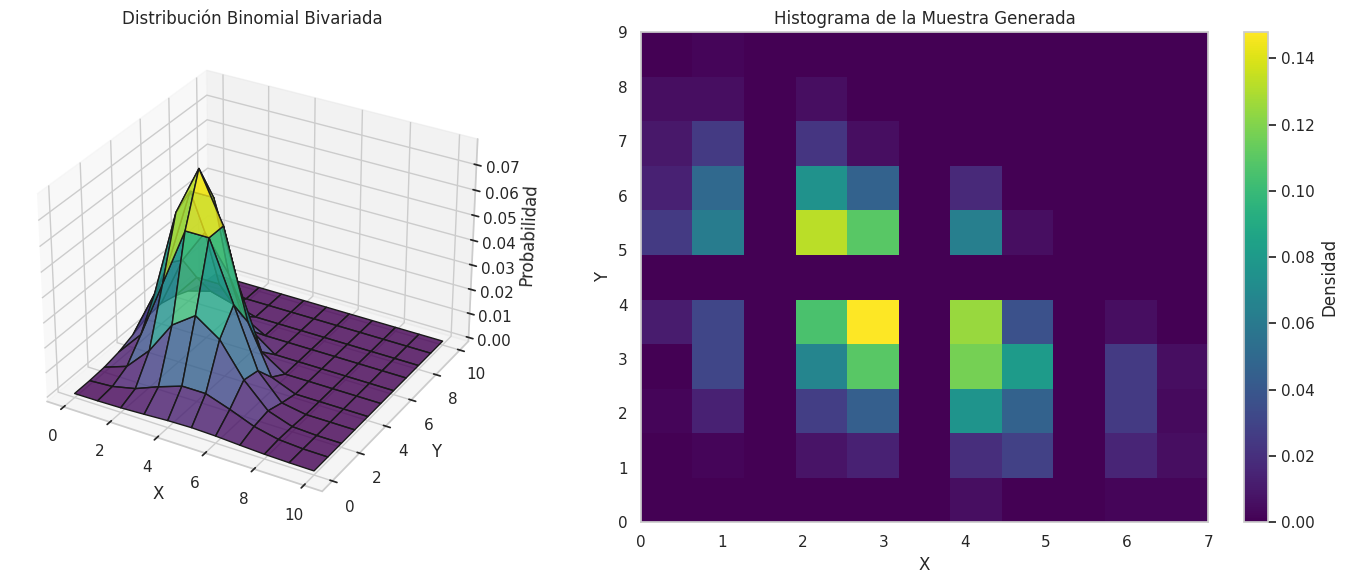

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def bivariate_binomial(n, p1, p2):
    """Genera una matriz de probabilidades para una distribución binomial bivariada."""
    probs = np.zeros((n + 1, n + 1))
    for x in range(n + 1):
        for y in range(n + 1 - x):
            probs[x, y] = (comb(n, x) * comb(n - x, y) *
                           (p1**x) * (p2**y) * ((1 - p1 - p2)**(n - x - y)))
    return probs

# Parámetros
n = 10
p1 = 0.3
p2 = 0.4
probs = bivariate_binomial(n, p1, p2)

# Generar muestra
n_1 = 1000
x_1, y_1 = [], []
for _ in range(n_1):
    x = np.random.choice(range(n + 1), p=np.sum(probs, axis=1))
    y = np.random.choice(range(n + 1), p=probs[x] / np.sum(probs[x]))
    x_1.append(x)
    y_1.append(y)

# Gráfica de distribución analítica
x, y = np.meshgrid(range(n + 1), range(n + 1))
z = probs[x, y]
fig = plt.figure(figsize=(15, 6))

# Subplot 1: Gráfica analítica
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, cmap='viridis', edgecolor='k', alpha=0.8)
ax1.set_title("Distribución Binomial Bivariada ")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Probabilidad')

# Subplot 2: Histograma de la muestra
ax2 = fig.add_subplot(122)
ax2.hist2d(x_1, y_1, bins=n+1, cmap='viridis', density=True)
ax2.set_title("Histograma de la Muestra Generada")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.colorbar(ax2.collections[0], ax=ax2, label='Densidad')

plt.tight_layout()
plt.show()


Para, ( n = 10 ), ( p_1 = 0.3 ), ( p_2 = 0.4):

**Media:**

$\mu_X =(n \cdot p_1) = (10 \cdot 0.3) =3, $

$\mu_Y =(n \cdot p_2) = (10 \cdot 0.4) = 4$

**Desviacion estandar:**

$\sigma_X = \sqrt{n \cdot p_1 \cdot (1 - p_1)} = \sqrt{10 \cdot 0.3 \cdot (1 - 0.3)} = \sqrt{2.1} \approx 1.449$

$\sigma_Y = \sqrt{n \cdot p_2 \cdot (1 - p_2)} = \sqrt{10 \cdot 0.4 \cdot (1 - 0.4)} = \sqrt{2.4} \approx 1.549$


In [40]:
# Cálculo de media y desviación estándar
media_1 = np.mean(np.column_stack((x_1, y_1)), axis=0)
desves_1 = np.std(np.column_stack((x_1, y_1)), axis=0)
print("Media Muestral: ", media_1)
print("Desviación Estándar Muestral: ", desves_1)

Media Muestral:  [3.011 3.918]
Desviación Estándar Muestral:  [1.45769647 1.52357343]


## **Distribución Uniforme Bivariada**

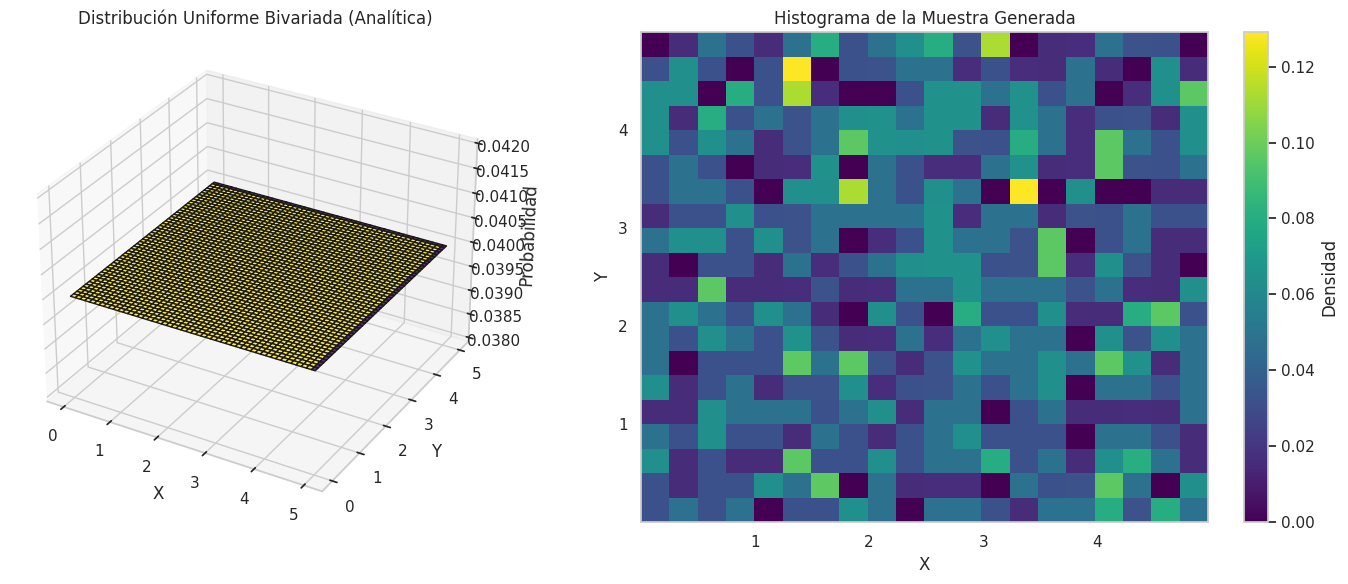

In [41]:
# Rango de la distribución
a, b = 0, 5
c, d = 0, 5
n_2 = 1000

# Crear la cuadrícula y calcular la distribución analítica
x = np.linspace(a, b, 200)
y = np.linspace(c, d, 200)
X, Y = np.meshgrid(x, y)
Z = np.ones_like(X) / ((b - a) * (d - c))

# Generar muestra
x_2 = np.random.uniform(a, b, n_2)
y_2 = np.random.uniform(c, d, n_2)

# Gráfica de la distribución analítica
fig = plt.figure(figsize=(15, 6))

# Subplot 1: Gráfica analítica
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)
ax1.set_title("Distribución Uniforme Bivariada (Analítica)")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Probabilidad')

# Subplot 2: Histograma de la muestra
ax2 = fig.add_subplot(122)
ax2.hist2d(x_2, y_2, bins=20, cmap='viridis', density=True)
ax2.set_title("Histograma de la Muestra Generada")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.colorbar(ax2.collections[0], ax=ax2, label='Densidad')

plt.tight_layout()
plt.show()


Para el rango \( [0, 5] × [0, 5] \):

**Media:**

$\mu_X = \frac{a + b}{2} = \frac{0 + 5}{2} = 2.5, $

$\mu_Y = \frac{c + d}{2} = \frac{0 + 5}{2} = 2.5$

**Desviación estándar**

$\sigma_X = \sqrt{\frac{(b - a)^2}{12}} = \sqrt{\frac{(5 - 0)^2}{12}} = \sqrt{\frac{25}{12}} \approx 1.443$

$\sigma_Y = \sqrt{\frac{(d - c)^2}{12}} = \sqrt{\frac{25}{12}} \approx 1.443$

In [42]:

# Cálculo de media y desviación estándar
media_2 = [np.mean(x_2), np.mean(y_2)]
desves_2 = [np.std(x_2), np.std(y_2)]

print("Media Muestral: ", media_2)
print("Desviación Estándar Muestral: ", desves_2)



Media Muestral:  [2.492383180506984, 2.5145712395617807]
Desviación Estándar Muestral:  [1.4054370409621704, 1.440652913348978]


## **Distribución Exponencial Bivariada**

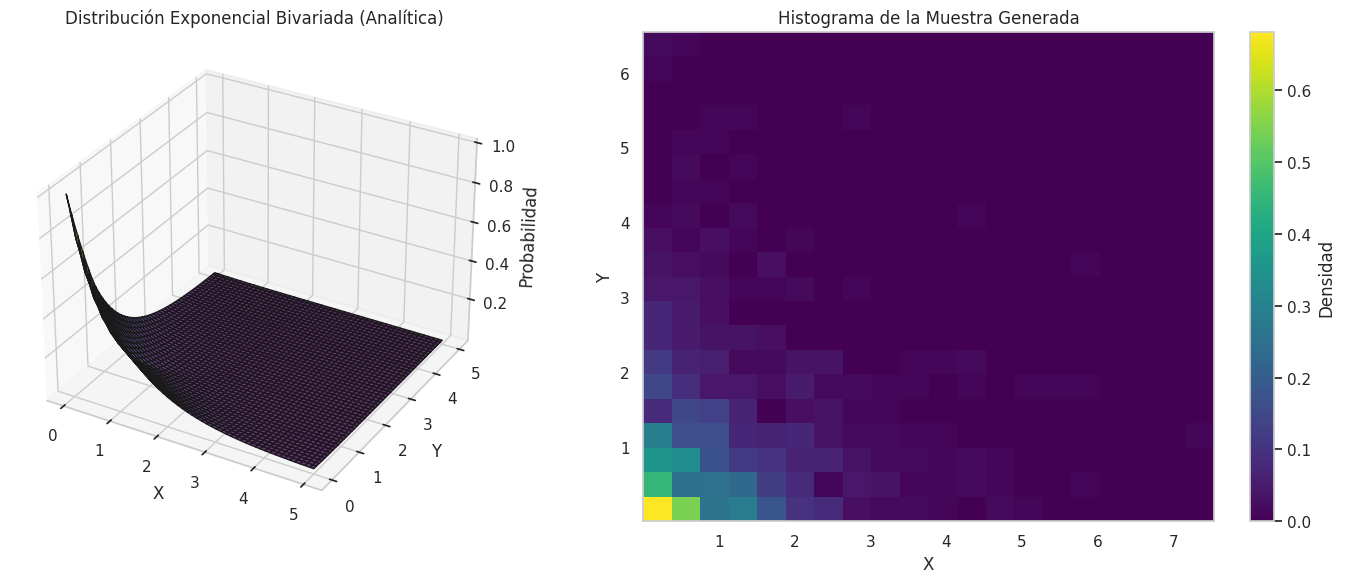

In [43]:
# Parámetros
lambda1, lambda2, lambda12 = 1.0, 1.0, 0.5
sample_size = 1000

# Crear cuadrícula y calcular distribución analítica
x = np.linspace(0, 5, 200)
y = np.linspace(0, 5, 200)
X, Y = np.meshgrid(x, y)
Z = lambda1 * lambda2 * np.exp(-lambda1 * X - lambda2 * Y - lambda12 * np.minimum(X, Y))

# Generar muestra
x_3 = np.random.exponential(1 / lambda1, sample_size)
y_3 = np.random.exponential(1 / lambda2, sample_size)

# Gráfica de la distribución analítica
fig = plt.figure(figsize=(15, 6))

# Subplot 1: Gráfica analítica
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)
ax1.set_title("Distribución Exponencial Bivariada (Analítica)")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Probabilidad')

# Subplot 2: Histograma de la muestra
ax2 = fig.add_subplot(122)
ax2.hist2d(x_3, y_3, bins=20, cmap='viridis', density=True)
ax2.set_title("Histograma de la Muestra Generada")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.colorbar(ax2.collections[0], ax=ax2, label='Densidad')



plt.tight_layout()
plt.show()


Para (λ_1   = 1.0 ), ( λ_2 = 1.0 \):

**Media**

$\mu_X = \frac{1}{\lambda_1} = 1.0, $

$ \mu_Y = \frac{1}{\lambda_2} = 1.0$

**desviación estándar**

$\sigma_X = \frac{1}{\lambda_1} = 1.0, \quad \sigma_Y = \frac{1}{\lambda_2} = 1.0$

In [44]:
# Cálculo de media y desviación estándar
media_3 = [np.mean(x_3), np.mean(y_3)]
desves_3 = [np.std(x_3), np.std(y_3)]


print("Media Muestral: ", media_3)

print("Desviación Estándar Muestral: ", desves_3)


Media Muestral:  [1.002893719480968, 1.026312617064082]
Desviación Estándar Muestral:  [0.9818011138221253, 1.0119497127888655]
